In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 6.8 MB/s eta 0:00:00


2.11.0
170498071/170498071 [==============================] - 3s 0us/step
x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)
Image label is:  [9]
The image class is:  truck
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
one hot label is:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Epoch 1/50
313/313 [==============================] - 16s 11ms/step - loss: 1.9464 - accuracy: 0.2903 - val_loss: 1.5401 - val_accuracy: 0.4461
Epoch 2/50
313/313 [==============================] - 3s 9ms/step - loss: 1.4770 - accuracy: 0.4618 - val_loss: 1.3276 - val_accuracy: 0.5391
Epoch 3/50
313/313 [==============================] - 3s 10ms/step - loss: 1.2777 - accuracy: 0.5439 - val_loss: 1.1861 - val_accuracy: 0.5721
Epoch 4/50
313/313 [==============================] - 3s 9ms/step - loss: 1.1609 - accuracy: 0.5883 - val_loss: 1.0108 - val_accuracy: 0.6505
Epoch 5/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0776 - accuracy: 0.6182 - val_loss: 0.9594 - val_accuracy: 0.6665
Epoch 6/50
313/313 [==============================] - 3s 9ms/step - loss: 1.0108 - accuracy: 0.6444 - val_loss: 0.8922 - val_accuracy: 0.6907
Epoch 7/50
313/313 [==============================] - 3s 9ms/step - loss: 0.9491 - accuracy: 0.6662 - val_loss: 0.8606 - val_accuracy: 0.7024
Epo

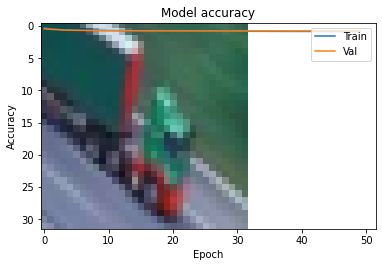

In [ ]:
#!/usr/bin/env python
# coding: utf-8


import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from tensorflow.python.client import device_lib




print(tf.__version__)


# sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
# print(device_lib.list_local_devices())
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()




#chech shape -> for x_train 50000 rows, images are 32x32 with 3 color channels
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)



#display an image from the train set with its label
index = 50
x_train[index]
img = plt.imshow(x_train[index])
print("Image label is: ", y_train[index])
classification = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
print("The image class is: ", classification[y_train[index][0]])




#one hot encode the y (classification)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)




print(y_train_one_hot)
print("one hot label is: ", y_train_one_hot[index])



#normalize the data
x_train = x_train / 255
x_test = x_test / 255



#build the model
# from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

model = Sequential()
# add convolutional layer for 32x32 images with 3 channels(RGB), use input_shape when conv2D layer is first layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))

# add max pooling layer
model.add(MaxPooling2D((2, 2)))

# randomly add dropout (set input to 0) to prevent overfitting
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# fully connected layer -> flatten image from the previous layer into a column vector
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

# Dense for the number of classes to classify, our example has 10
model.add(Dense(10, activation='softmax'))

# optimize model using stochastic gradient descent
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# In[ ]:


hist = model.fit(x_train, y_train_one_hot, batch_size=128, epochs=50, validation_split=0.2)


# In[ ]:


#evaluate the model
model.evaluate(x_test, y_test_one_hot)[1]


# In[ ]:


#plot accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()


# In[ ]:


#test model on a downloaded image (not from train or test set)
# from PIL import Image
# from skimage.transform import resize
# image = Image.open('kitty.jpg')
# resized_image = resize(np.asarray(image), (32,32,3))
# img = plt.imshow(resized_image)
# predictions = model.predict(np.array([resized_image]))
# predictions
# predicted_class = np.argmax(predictions)
# print(classification[predicted_class])


# In[ ]:




In [ ]:

# #test model on a downloaded image (not from train or test set)
# from PIL import Image
# from skimage.transform import resize
# image = Image.open('kitty.jpg')
# resized_image = resize(np.asarray(image), (32,32,3))
# img = plt.imshow(resized_image)
# predictions = model.predict(np.array([resized_image]))
# predictions
# predicted_class = np.argmax(predictions)

# print(classification[predicted_class])

# # Prepare to augment the plot
# fig = plt.gcf()
# allaxes = fig.get_axes()

# # Show the actual/predicted class
# allaxes[0].set_title('Actual: {}, pred: {}'.format(
#     'Cat', classification[predicted_class]))

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


deer
['deer', 'airplane', 'frog', 'bird', 'automobile', 'cat', 'airplane', 'deer', 'bird', 'horse', 'ship', 'cat', 'automobile', 'bird', 'ship', 'airplane', 'ship', 'cat', 'dog', 'bird', 'deer', 'automobile', 'ship', 'truck', 'automobile', 'bird', 'truck', 'horse', 'bird', 'truck']


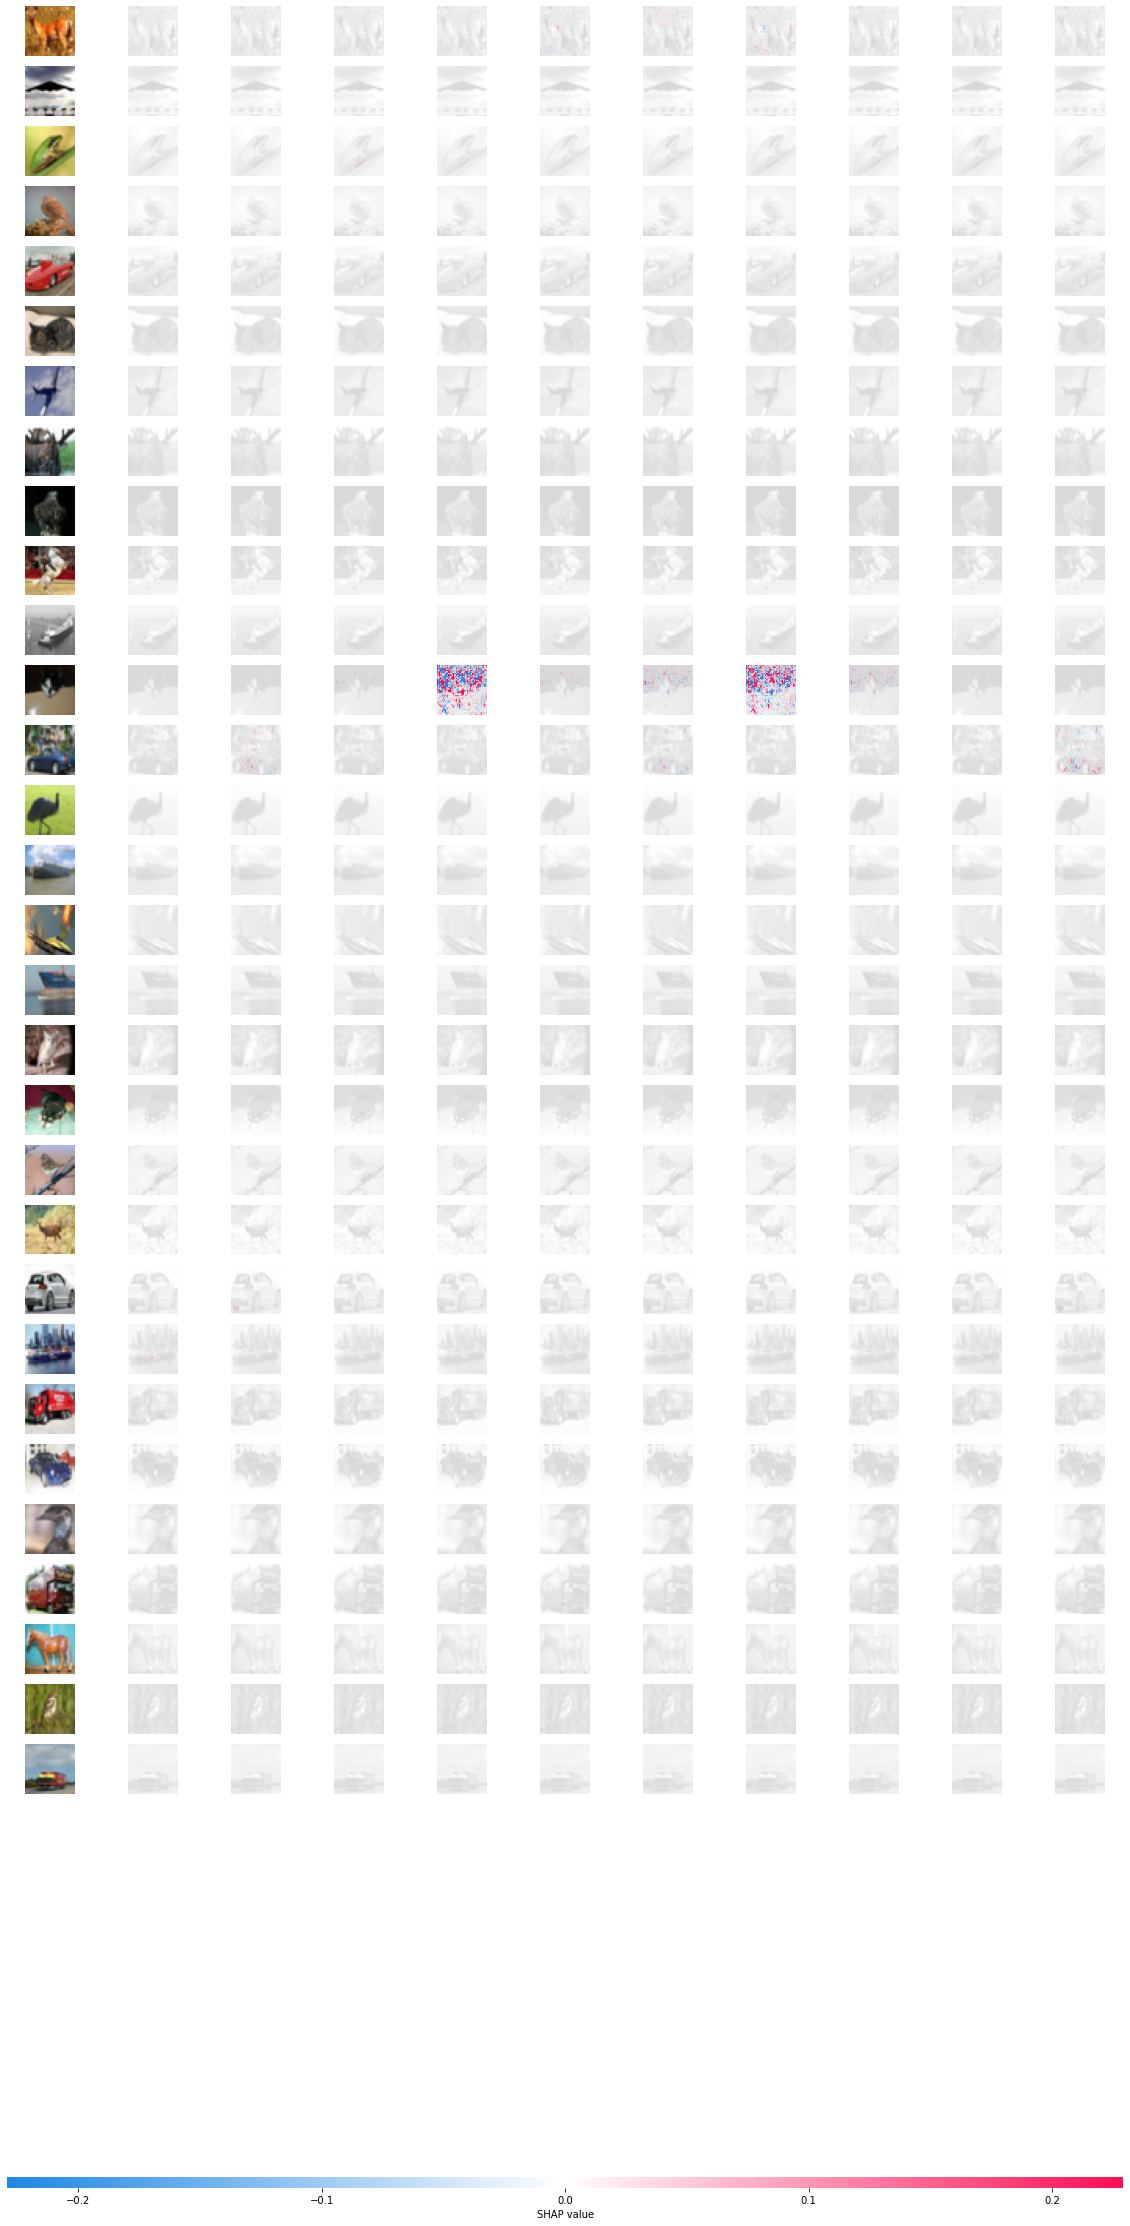

<Figure size 432x288 with 0 Axes>

In [ ]:
#Explain previous image with SHAP
import shap
background = x_test[100:200]
explainer = shap.DeepExplainer(model, background)

n_test_images = 30
test_images =  x_test[110:110+n_test_images]
test_labels = y_test[110:110+n_test_images]
# print(test_labels)

shap_values = explainer.shap_values(test_images)

# print()
# In[ ]:

print(classification[test_labels[0][0] ])

labels_names = list()

for image_label_array in test_labels:
  labels_names.append(classification[image_label_array[0]])

print(labels_names)


shap.image_plot(shap_values, test_images)

# Prepare to augment the plot
fig = plt.gcf()
allaxes = fig.get_axes()

# Show the actual/predicted class
# allaxes[0].set_title('Actual: {}, pred: {}'.format(
#     classification[], '1'))

# Show the probability of each class
# There are 11 axes for each picture: 1 for the digit + 10 for each SHAP
# There is a last axis for the scale - we don't want to apply a label for that one
# prob = output[i].detach().numpy()
# for x in range(1, len(allaxes)-1):
#     allaxes[x].set_title('{:.2%}'.format(prob[x-1]), fontsize=14)
plt.show()



In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0
